In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import pandas as pd
import numpy as np
from src.loan_pred.preprocessing.preprocess import convert_dtype

In [27]:
train_perf = pd.read_csv("../data/raw_data/train/trainperf.csv")
train_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [28]:
train_perf.shape

(4368, 10)

In [29]:
cols_dtypes = {
    "customerid": "category",
    "systemloanid": "int",
    "loannumber": "int",
    "approveddate": "datetime",
    "creationdate": "datetime",
    "loanamount": "float",
    "totaldue": "float",
    "termdays": "int",
    "referredby": "category",
    "good_bad_flag": "category"
}
train_perf = convert_dtype(data=train_perf, columns_type=cols_dtypes)
train_perf.dtypes

customerid             category
systemloanid              int32
loannumber                int32
approveddate     datetime64[ns]
creationdate     datetime64[ns]
loanamount              float64
totaldue                float64
termdays                  int32
referredby             category
good_bad_flag          category
dtype: object

## Missing values

In [30]:
train_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good


In [31]:
def preprocess_loans(df):
    col_to_select = ['customerid', 'loannumber', "approveddate", 'loanamount', 'totaldue', 'termdays', "good_bad_flag"]
    df = df[col_to_select].drop_duplicates()
    return df

train_perf = preprocess_loans(train_perf)
train_perf.head()

,customerid,loannumber,approveddate,loanamount,totaldue,termdays,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,12,2017-07-25 08:22:56,30000.0,34500.0,30,Good
1,8a85886e54beabf90154c0a29ae757c0,2,2017-07-05 17:04:41,15000.0,17250.0,30,Good
2,8a8588f35438fe12015444567666018e,7,2017-07-06 14:52:57,20000.0,22250.0,15,Good
3,8a85890754145ace015429211b513e16,3,2017-07-27 19:00:41,10000.0,11500.0,15,Good
4,8a858970548359cc0154883481981866,9,2017-07-03 23:42:45,40000.0,44000.0,30,Good


In [32]:
train_perf.isnull().sum()/train_perf.shape[0] * 100

customerid       0.0
loannumber       0.0
approveddate     0.0
loanamount       0.0
totaldue         0.0
termdays         0.0
good_bad_flag    0.0
dtype: float64

In [33]:
train_perf.dtypes

customerid             category
loannumber                int32
approveddate     datetime64[ns]
loanamount              float64
totaldue                float64
termdays                  int32
good_bad_flag          category
dtype: object

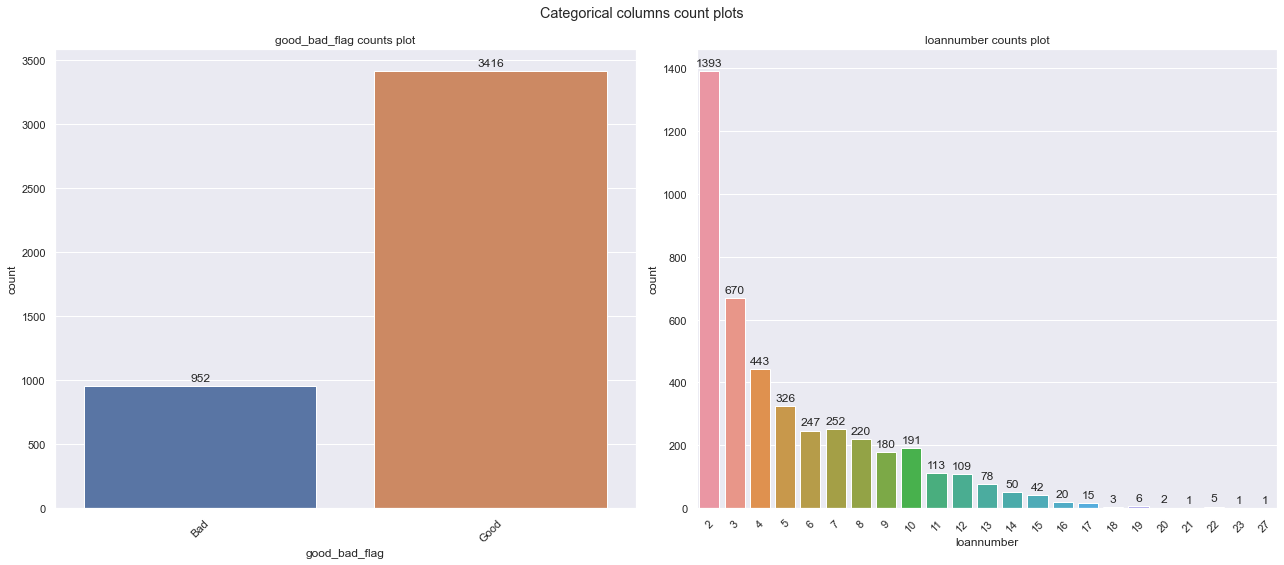

In [34]:
from src.loan_pred.visualization.visualize import Plots

plots = Plots(data=train_perf, cat_cols=["good_bad_flag", "loannumber"])
plots.plot_all_cats(nrows=1, ncols=2, figsize=(18,8))

In [38]:
from pathlib import Path
path = Path("../data/preprocessed/train/train_perf.csv")
path.parent.mkdir(parents=True, exist_ok=True)
train_perf.to_csv(path, index=False)